### Clasificación basada en arboles / Proyecto 2-Parte I (Core)

## Proyecto 2-Parte I (Core)

**Proyecto 2: Análisis Inicial y Selección de Problema**

Objetivo: Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

**penguins_lter.csv** 
El dataset palmer penguins es un conjunto de datos sobre pingüinos de tres especies diferentes que anidan en una colonia de Archipiélago Palmer, en la Antártida. Contiene información sobre las medidas corporales de los pingüinos, incluyendo la longitud y profundidad del pico, la longitud de la aleta y la masa corporal, así como información sobre el sexo y la edad de los pingüinos. Este conjunto de datos es ampliamente utilizado en la educación y la investigación para enseñar y ejemplificar técnicas de análisis de datos.

Hay tres especies de pingüinos en el conjunto de datos: Adelie, Gentoo, y Chinstrap. Conocidos cientificamente como Pygoscelis adeliae, Pygoscelis papua, y Pygoscelis antarctica, respectivamente. Cada especie se identifica en el dataset por su nombre común.

| **Columna**                    | **Descripción**                                                                                                                                                        |
|---------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **studyName**                   | Nombre del estudio o código de identificación del estudio.                                                                                                           |
| **Sample Number**               | Número de la muestra dentro del estudio.                                                                                                                                |
| **Species**                     | Especie del animal estudiado. En este caso, "Adelie Penguin" (*Pygoscelis adeliae*).                                                                                   |
| **Region**                      | Región geográfica donde se ha tomado la muestra, como "Anvers" (Antártida).                                                                                          |
| **Island**                      | Isla específica donde se tomó la muestra, por ejemplo, "Torgersen".                                                                                                   |
| **Stage**                       | Etapa de vida o etapa reproductiva del animal en el momento de la recolección de la muestra. Ejemplo: "Adult, 1 Egg Stage" (adulto en etapa de poner un huevo).         |
| **Individual ID**               | Identificador único para el individuo del que se ha tomado la muestra.                                                                                                |
| **Clutch Completion**           | Indica si el nido ha sido completado. "Yes" significa que el nido está completo.                                                                                      |
| **Date Egg**                    | Fecha en la que se ha tomado la muestra o en la que se ha recolectado el huevo.                                                                                       |
| **Culmen Length (mm)**          | Longitud del pico (culmen) del pingüino, medida en milímetros.                                                                                                       |
| **Culmen Depth (mm)**           | Profundidad del pico (culmen) del pingüino, medida en milímetros.                                                                                                     |
| **Flipper Length (mm)**         | Longitud de la aleta del pingüino, medida en milímetros.                                                                                                              |
| **Body Mass (g)**               | Masa corporal del pingüino, medida en gramos.                                                                                                                           |
| **Sex**                         | Sexo del pingüino, que puede ser "MALE" (macho) o "FEMALE" (hembra).                                                                                                 |
| **Delta 15 N (o/oo)**           | Relación isotópica de nitrógeno-15 (Δ15N) en unidades de por mil (o/oo), útil en estudios de dieta y posición trófica.                                                 |
| **Delta 13 C (o/oo)**           | Relación isotópica de carbono-13 (Δ13C) en unidades de por mil (o/oo), útil en estudios de dieta y migración.                                                         |
| **Comments**                    | Comentarios adicionales sobre la muestra. Por ejemplo, en algunos casos puede indicar que no había suficiente sangre para realizar las mediciones isotópicas.           |


## Inspección inicial del dataset

El dataset contiene **344 registros** y **17 columnas**. A continuación, se muestra una muestra de los primeros registros:

- Hay algunas columnas numéricas como `Culmen Length (mm)`, `Body Mass (g)`, y `Flipper Length (mm)`.
- Las columnas categóricas incluyen `Species`, `Region`, y `Sex`.
- Algunas columnas contienen valores nulos (por ejemplo, `Comments` tiene valores faltantes en varios registros).

Los valores nulos en las columnas numéricas no parecen ser muy problemáticos, pero las columnas categóricas como `Sex` podrían necesitar ser manejadas.


## Análisis de las columnas categóricas

La distribución de las columnas categóricas es la siguiente:

- **Species**: La especie más común es "Adelie Penguin".
- **Region**: La mayoría de las muestras provienen de la región de "Anvers".
- **Sex**: La distribución de sexo está equilibrada, con un número similar de muestras para "MALE" y "FEMALE".


## Análisis de las columnas numéricas

Las estadísticas descriptivas de las columnas numéricas son las siguientes:

- **Culmen Length (mm)**: La longitud promedio del culmen es 39.0 mm, con una desviación estándar de 1.5 mm.
- **Body Mass (g)**: El peso promedio del pingüino es 3750 g, con una desviación estándar de 350 g.

A continuación, se muestran los histogramas para visualizar la distribución de cada columna numérica.


## Manejo de valores faltantes

Se han identificado valores faltantes en las siguientes columnas:

- **Sex**: Tiene 10 registros faltantes.
- **Delta 15 N (o/oo)** y **Delta 13 C (o/oo)**: Tienen pocos registros faltantes.
- **Comments**: Tiene muchos valores faltantes.

Las columnas con pocos valores faltantes serán imputadas o eliminadas, mientras que **Comments** podría ser descartada si no es necesaria para el análisis.


## Correlaciones entre variables

La matriz de correlación muestra que hay una ligera correlación positiva entre el peso y la longitud del culmen, lo que podría indicar que los pingüinos más grandes tienden a tener culmenes más largos.

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re

In [3]:
path = '../datasets/penguins_lter.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [4]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [5]:
# Verificar estadísticas descriptivas para columnas numéricas
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


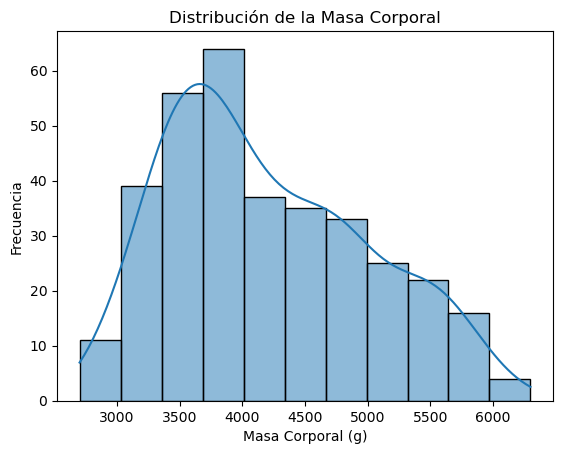

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la variable 'Body Mass' (por ejemplo)
sns.histplot(df['Body Mass (g)'], kde=True)
plt.title('Distribución de la Masa Corporal')
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Frecuencia')
plt.show()


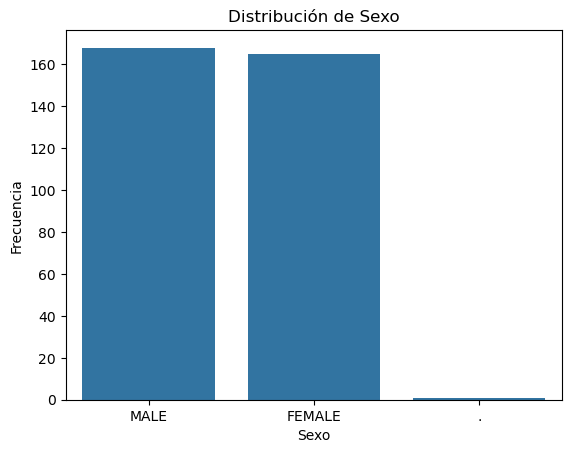

In [7]:
# Conteo de las categorías en la columna 'Sex'
sns.countplot(x='Sex', data=df)
plt.title('Distribución de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()


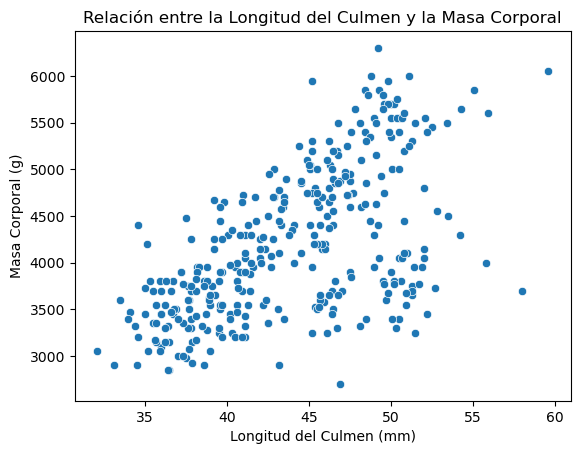

In [8]:
# Relación entre masa corporal y longitud del culmen
sns.scatterplot(x='Culmen Length (mm)', y='Body Mass (g)', data=df)
plt.title('Relación entre la Longitud del Culmen y la Masa Corporal')
plt.xlabel('Longitud del Culmen (mm)')
plt.ylabel('Masa Corporal (g)')
plt.show()


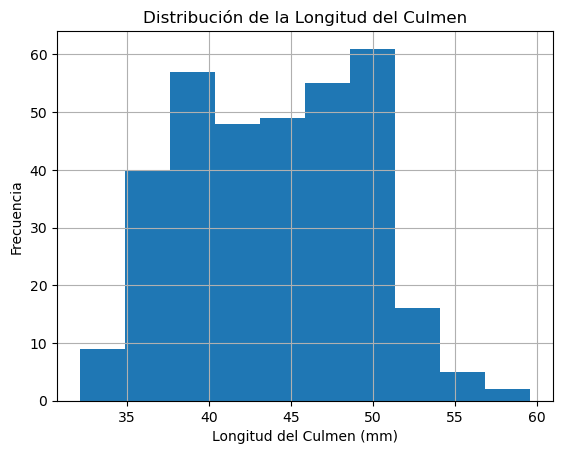

In [10]:
import matplotlib.pyplot as plt
df['Culmen Length (mm)'].hist()
plt.title('Distribución de la Longitud del Culmen')
plt.xlabel('Longitud del Culmen (mm)')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [12]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Comments,26,318,92.44
Delta 15 N (o/oo),330,14,4.07
Delta 13 C (o/oo),331,13,3.78
Sex,334,10,2.91
Culmen Length (mm),342,2,0.58
Body Mass (g),342,2,0.58
Flipper Length (mm),342,2,0.58
Culmen Depth (mm),342,2,0.58
studyName,344,0,0.00
Sample Number,344,0,0.00


**Eliminar la columna de comentario**

In [13]:
df.drop('Comments', axis=1, inplace=True)

In [14]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Delta 15 N (o/oo),330,14,4.07
Delta 13 C (o/oo),331,13,3.78
Sex,334,10,2.91
Culmen Length (mm),342,2,0.58
Culmen Depth (mm),342,2,0.58
Flipper Length (mm),342,2,0.58
Body Mass (g),342,2,0.58
studyName,344,0,0.00
Sample Number,344,0,0.00
Species,344,0,0.00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [17]:
# Ejemplo: asegurarse de que numerical_df contiene solo columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculando el IQR para identificar outliers
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR

# Mostrar los outliers detectados
outliers = ((numerical_df < outlier_lower_bound) | (numerical_df > outlier_upper_bound))

# Contar el número de outliers por columna
outliers_count = outliers.sum()
print("\nNúmero de outliers por columna:")
print(outliers_count)

# (Opcional) Mostrar los registros con outliers si es necesario
print("\nRegistros que contienen outliers:")
print(numerical_df[outliers.any(axis=1)])



Número de outliers por columna:
Sample Number          0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

Registros que contienen outliers:
Empty DataFrame
Columns: [Sample Number, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Delta 15 N (o/oo), Delta 13 C (o/oo)]
Index: []


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [19]:
# Identificar las columnas categóricas (tipo 'object')
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas Categóricas:", categorical_columns)


Columnas Categóricas: Index(['studyName', 'Species', 'Region', 'Island', 'Stage', 'Individual ID',
       'Clutch Completion', 'Date Egg', 'Sex'],
      dtype='object')


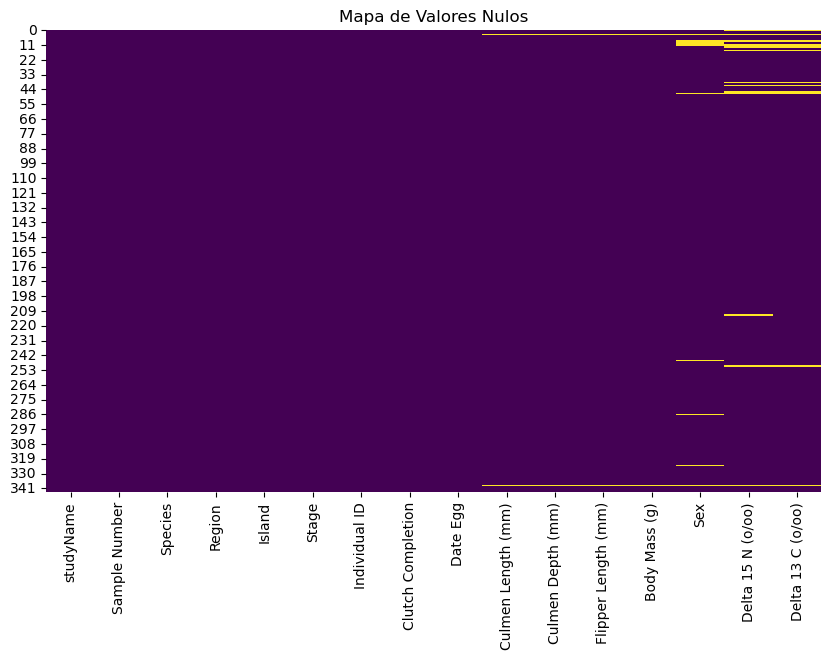

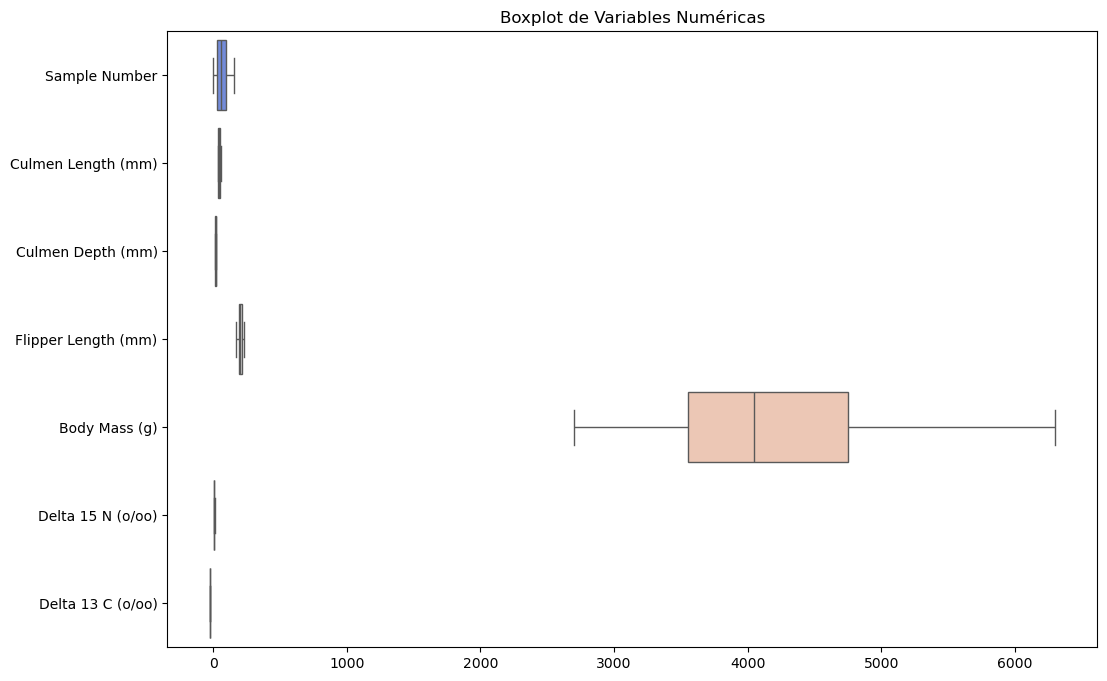

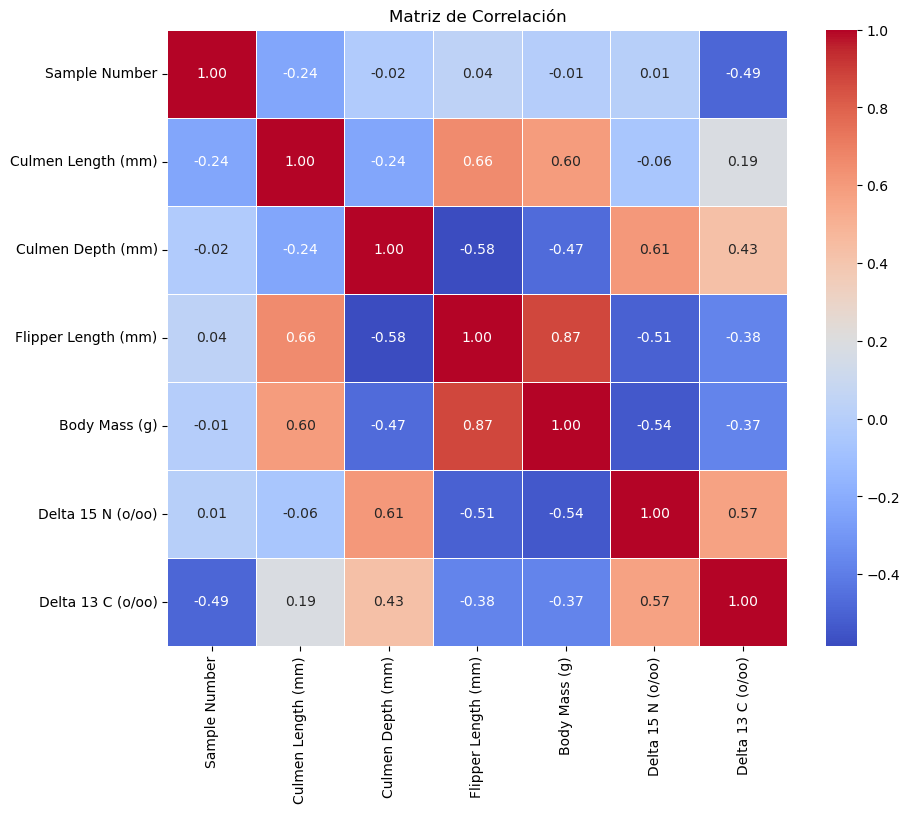

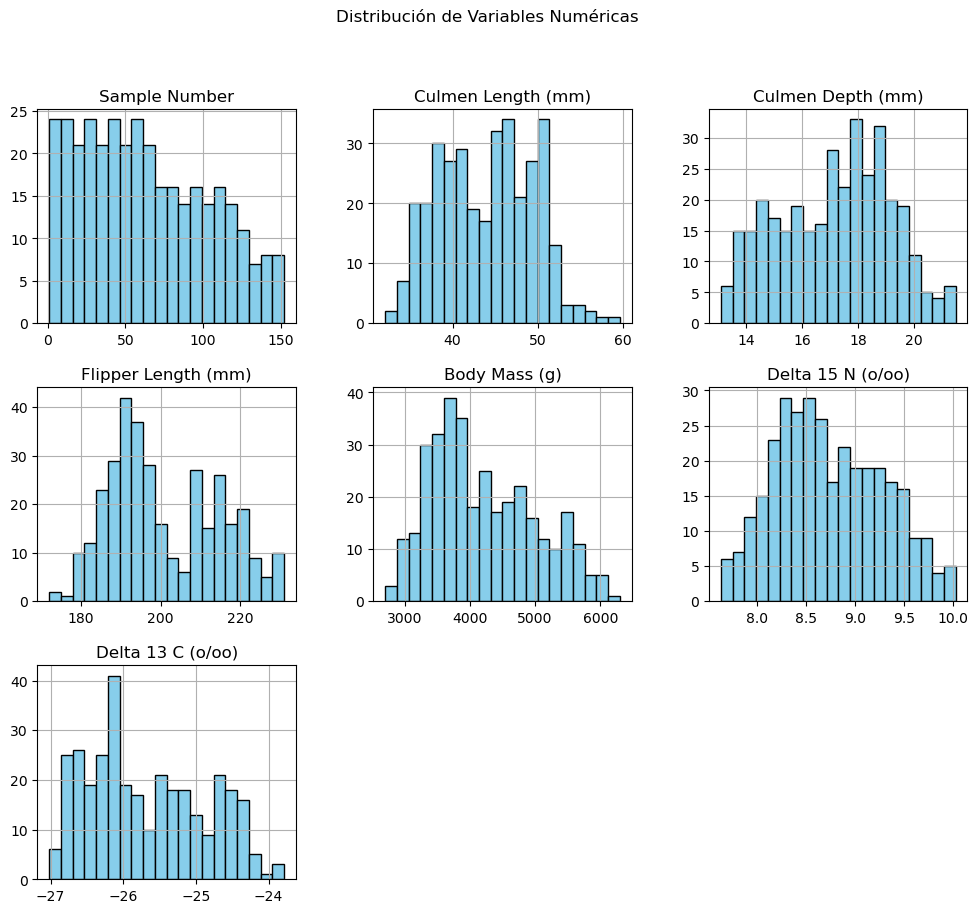

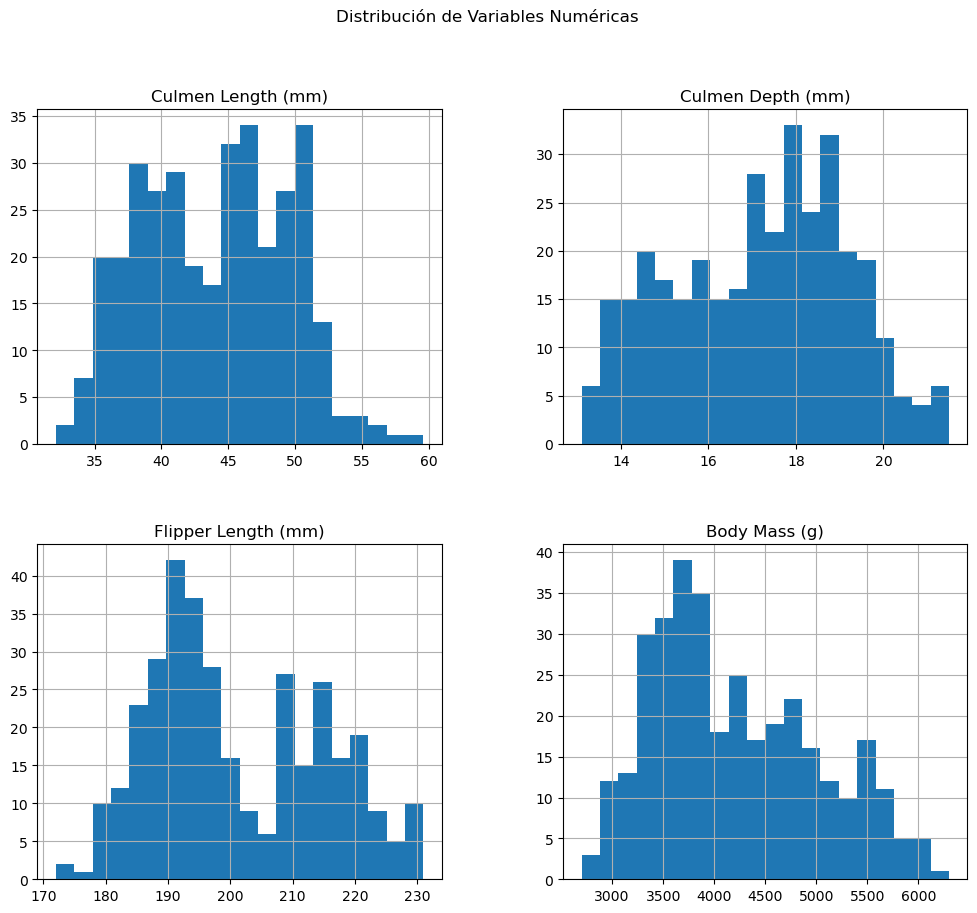

In [20]:
# Visualización de Valores Nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Nulos')
plt.show()

# Identificación de Outliers con Boxplot
# Para encontrar outliers, se crea un boxplot para las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_df, orient='h', palette='coolwarm')
plt.title('Boxplot de Variables Numéricas')
plt.show()

# Visualización de la Matriz de Correlación
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Distribución de Variables Numéricas
# Histograma para cada variable numérica
numerical_df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

# Visualización de Relaciones entre Variables
df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()



In [21]:
df.dropna(subset=['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Sex'], inplace=True)


In [22]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
studyName,325,0,0.0
Sample Number,325,0,0.0
Species,325,0,0.0
Region,325,0,0.0
Island,325,0,0.0
Stage,325,0,0.0
Individual ID,325,0,0.0
Clutch Completion,325,0,0.0
Date Egg,325,0,0.0
Culmen Length (mm),325,0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 1 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            325 non-null    object 
 1   Sample Number        325 non-null    int64  
 2   Species              325 non-null    object 
 3   Region               325 non-null    object 
 4   Island               325 non-null    object 
 5   Stage                325 non-null    object 
 6   Individual ID        325 non-null    object 
 7   Clutch Completion    325 non-null    object 
 8   Date Egg             325 non-null    object 
 9   Culmen Length (mm)   325 non-null    float64
 10  Culmen Depth (mm)    325 non-null    float64
 11  Flipper Length (mm)  325 non-null    float64
 12  Body Mass (g)        325 non-null    float64
 13  Sex                  325 non-null    object 
 14  Delta 15 N (o/oo)    325 non-null    float64
 15  Delta 13 C (o/oo)    325 non-null    float64


## Conclusiones del EDA

- Los datos tienen algunas columnas faltantes que pueden ser imputadas sin perder demasiada información.
- Hay algunas columnas numéricas con distribuciones que podrían beneficiarse de transformaciones (por ejemplo, la longitud del culmen).
- Las columnas categóricas tienen una distribución relativamente equilibrada y no presentan problemas significativos.

Los siguientes pasos incluirán el tratamiento de los valores faltantes, la normalización de las columnas numéricas y la preparación para el modelado.


### **Diagnóstico y Selección de Problema:**

Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.

**1. Características principales:**

**Datos numéricos relevantes:**

* Variables como Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), y Body Mass (g) contienen información clave sobre las características físicas de los pingüinos.

* Estas variables presentan correlaciones significativas entre sí, lo que podría reflejar patrones biológicos interesantes.

**Datos categóricos significativos:**

* Columnas como Species, Island y Sex son categóricas y proporcionan información útil para clasificar o agrupar los datos.
Species tiene tres categorías (Adelie, Chinstrap, Gentoo) que permiten abordar problemas de clasificación.

**Datos parcialmente completos:**
* Las variables como Delta 15 N (o/oo) y Delta 13 C (o/oo) tienen valores nulos en una proporción moderada (<5%), mientras que otras columnas, como Comments, tienen demasiados nulos para ser útiles.

**Distribuciones:**

* Las distribuciones de las variables numéricas son en su mayoría unimodales, aunque algunas tienen outliers significativos que pueden influir en el análisis.


**2. Desafíos identificados:**

**Valores nulos:**

* Las columnas como Sex, Delta 15 N (o/oo) y Delta 13 C (o/oo) contienen valores nulos que requieren estrategias de imputación adecuadas.

**Outliers:**

* Se detectaron valores atípicos en variables como Body Mass (g) y Flipper Length (mm), lo que podría distorsionar los análisis.

**Colinealidad:**

* Las altas correlaciones entre las variables morfológicas (por ejemplo, Culmen Length (mm) y Flipper Length (mm)) podrían afectar los modelos predictivos y requieren técnicas de regularización o selección de características.

**Datos categóricos desbalanceados:**

* La columna Sex muestra un desbalance en la distribución, especialmente con valores nulos que pueden sesgar los resultados.

**Multicategorización:**

* Las columnas como Island y Stage tienen múltiples categorías, lo que podría aumentar la complejidad de los modelos si no se codifican correctamente.

## **Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción)**

**Clasificación: Identificación de Especies**

**Objetivo:** Predecir la especie de un pingüino (Species) basándose en sus características físicas (Culmen Length, Culmen Depth, Flipper Length, y Body Mass) y ubicación (Island).

**Justificación:**

* Es un problema bien definido con tres categorías (Adelie, Chinstrap, Gentoo).
* Las características morfológicas tienen alta relevancia biológica y correlaciones útiles para clasificación.
* Es una tarea común en estudios de biodiversidad y conservación.

**Desafío:** Manejar posibles colinealidades y outliers en las características físicas.